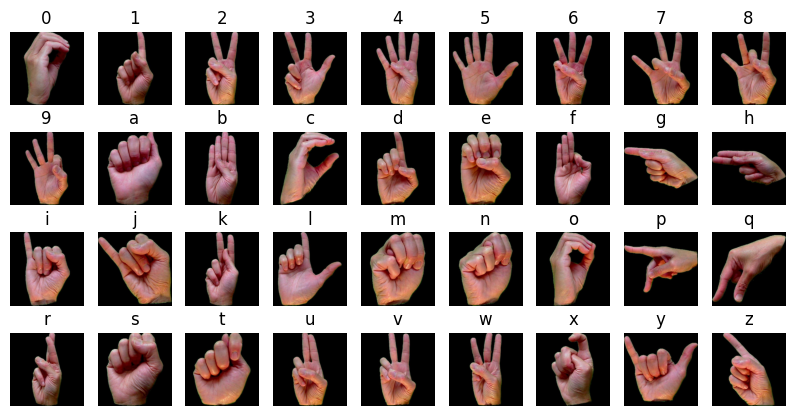

In [206]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

path = "./asl_dataset/"

fig, ax = plt.subplots(4, 9, figsize=(10, 5))
img_classes = [os.path.join(path, im) for im in os.listdir(path)]
ax = ax.flatten()

data, label = [], []

for i, img_class in enumerate(img_classes):
    img = os.listdir(img_class)[np.random.randint(0, 10)]
    img_path = os.path.join(img_class, img)
    image = cv2.imread(img_path)
    ax[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[i].set_title(os.path.basename(img_class))
    ax[i].axis('off')

    # Przetwarzanie obrazu
    img = cv2.resize(image, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    data.append(img)
    label.append(os.path.basename(img_class))

plt.show()

data = np.array(data)
label = np.array(label)
label = label.astype(str)



In [220]:
import cv2 as cv
import math as m

path = "./asl_dataset/"

labels = os.listdir(path)
X_train = []
y_train = []
X_test = []
y_test = []


for i, label in enumerate(labels):
    folderpath = path + label + '/'
    for file in os.listdir(folderpath)[0:m.floor(len(os.listdir(folderpath))*0.7)]:
        img_path = folderpath + file
        img = cv.imread(img_path)
        img = cv.resize(img, (128, 128))
        X_train.append(np.array(img))
        y_train.append(i)
    for file in os.listdir(folderpath)[m.floor(len(os.listdir(folderpath))*0.7):]:
        img_path = folderpath + file
        img = cv.imread(img_path)
        img = cv.resize(img, (128, 128))
        X_test.append(np.array(img))
        y_test.append(i)
   

X_train = np.array(X_train)/255
y_train = np.array(y_train)
X_test = np.array(X_test)/255
y_test = np.array(y_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1760, 128, 128, 3)
(1760,)
(755, 128, 128, 3)
(755,)


<function matplotlib.pyplot.show(close=None, block=None)>

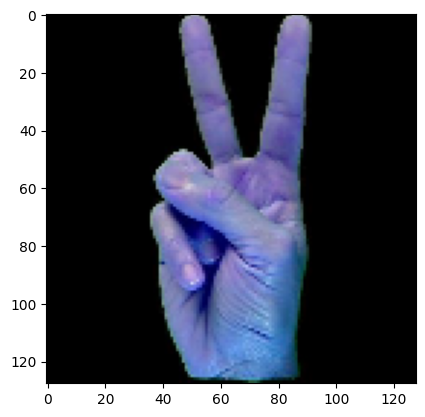

In [221]:
num_img = 100

plt.imshow(X_train[num_img])
plt.show

In [222]:
print(labels[y_train[num_img]])

2


In [223]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest = RandomForestClassifier(max_depth=12, min_samples_split=7)
random_forest.fit(X_train.reshape(len(X_train), -1), y_train)

y_pred = random_forest.predict(X_test.reshape(len(X_test), -1))

accuracy = accuracy_score(y_test, y_pred)
print("Dokładność klasyfikacji: {:.2f}%".format(accuracy * 100))

Dokładność klasyfikacji: 64.50%


In [224]:
from sklearn.model_selection import train_test_split

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.3, random_state=42)

print("Training set shapes:", X_train.shape, y_train.shape)
print("Validation set shapes:", X_val.shape, y_val.shape)
print("Test set shapes:", X_test.shape, y_test.shape)


Training set shapes: (1760, 128, 128, 3) (1760,)
Validation set shapes: (227, 128, 128, 3) (227,)
Test set shapes: (528, 128, 128, 3) (528,)


In [225]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [226]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(36, activation='softmax')
])

In [227]:
model.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_135 (Conv2D)         (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_133 (MaxPooli  (None, 63, 63, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_136 (Conv2D)         (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_134 (MaxPooli  (None, 30, 30, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_137 (Conv2D)         (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_135 (MaxPooli  (None, 14, 14, 128)    

In [228]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [229]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/30
55/55 [==============================] - 23s 388ms/step - loss: 3.3417 - accuracy: 0.0847 - val_loss: 2.7855 - val_accuracy: 0.4009
Epoch 2/30
55/55 [==============================] - 20s 362ms/step - loss: 2.3582 - accuracy: 0.3114 - val_loss: 2.0445 - val_accuracy: 0.5330
Epoch 3/30
55/55 [==============================] - 22s 392ms/step - loss: 1.6464 - accuracy: 0.5000 - val_loss: 1.5216 - val_accuracy: 0.5859
Epoch 4/30
55/55 [==============================] - 21s 380ms/step - loss: 1.3379 - accuracy: 0.5847 - val_loss: 1.4408 - val_accuracy: 0.6300
Epoch 5/30
55/55 [==============================] - 21s 377ms/step - loss: 1.0789 - accuracy: 0.6642 - val_loss: 1.2782 - val_accuracy: 0.6344
Epoch 6/30
55/55 [==============================] - 21s 379ms/step - loss: 0.9856 - accuracy: 0.6915 - val_loss: 1.2424 - val_accuracy: 0.6256
Epoch 7/30
55/55 [==============================] - 20s 360ms/step - loss: 0.8687 - accuracy: 0.7114 - val_loss: 1.2766 - val_accuracy: 0.6300

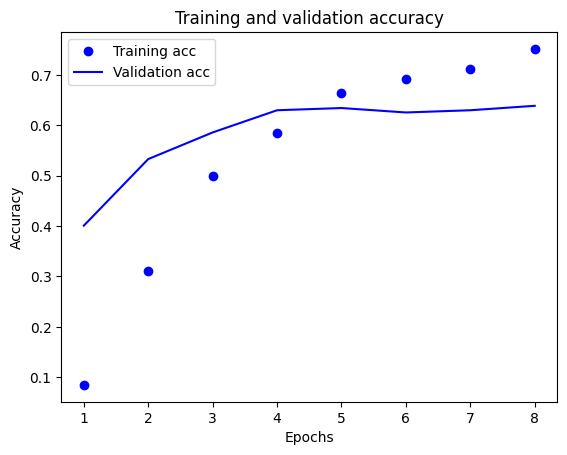

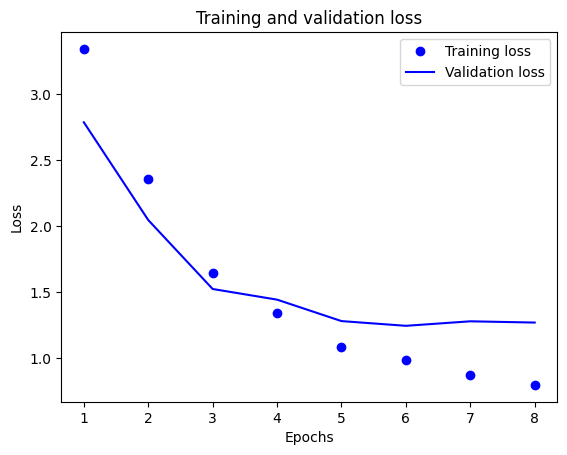

In [230]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [231]:
results = model.evaluate(X_test, y_test)
print(results)

17/17 [==============================] - 2s 98ms/step - loss: 1.2716 - accuracy: 0.6591
[1.2716352939605713, 0.6590909361839294]


In [ ]:
from time import time
from keras.wrappers.scikit_learn import KerasClassifier

start = time()

# create model
model = KerasClassifier(model, verbose=1)
# define parameters and values for grid search 
param_grid = {
    'pool_type': ['max', 'average'],
    'conv_activation': ['sigmoid', 'tanh'],    
    'epochs': [n_epochs_cv],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=n_cv)
grid_result = grid.fit(X_train, to_categorical(y_train))

# summarize results
print('time for grid search = {:.0f} sec'.format(time()-start))
display_cv_results(grid_result)

In [203]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'optimizer': ['adam', 'sgd'],
    'filters': [32, 64],
    'kernel_size': [(3, 3), (5, 5)],
    'dense_units': [64, 128],
    'dropout_rate': [0.3, 0.5]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)

In [204]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from scikeras.wrappers import KerasRegressor

# Dopasowanie Grid Search do danych treningowych
grid_search.fit(X_train, y_train)

# Najlepsze parametry i wyniki
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Przewidywanie etykiet dla danych testowych
y_pred = grid_search.predict(X_test)

# Dokładność klasyfikacji
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność klasyfikacji: {:.2f}%".format(accuracy * 100))

TypeError: Cannot clone object '<keras.engine.sequential.Sequential object at 0x000002294213D250>' (type <class 'keras.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.